# Perceptrón (OR)

En el campo de la inteligencia artificial, el perceptrón simple es una red neuronal artificial de una sola capa, inspirada en el comportamiento y funcionamiento del cerebro humano.



In [1]:
import numpy as np
import matplotlib.pyplot as plt

Definimos nuestra clase Perceptron la cual contará con los siguientes métodos:

funct(): Implementación de la función de activación que en este caso es paso unitario
    
propagacion(): Encargada de realizar el producto punto de los pesos y entrada para después pasarlo por la función de activación

actualizacion(): La cual se encargará de actualizar los pesos, sumar el alfa y después multiplicarlo por el error y la entrada correcpondiente

In [2]:
class Perceptron:
    def __init__(self, n, alfa):
        self.pesos = np.random.randn(n)
        print(self.pesos)
        self.n = n
        self.alfa =  alfa
    
    def funct(self, x): #unit step
        if x>0:
            return 1
        else:
            return 0
    
    def propagacion(self, entradas):
        self.salida = self.funct(self.pesos.dot(entradas))
        self.entradas = entradas
        
    def actualizacion(self, salida):
        for i in range(0,self.n):
            self.pesos[i] = self.pesos[i]+self.alfa * (salida-self.salida) * self.entradas[i]
    

Utilizamos los siguientes datos de entrada que representan la operación OR incluyendo una tercera entrada para la bias

<img src="https://eduardopayan93.files.wordpress.com/2014/08/tabla_de_verdad_or.jpg">

Utilizamos la clase Perceptron para definir nuestro objeto, donde se generan los pesos aleatoriamente y escribimos nuestros arreglos para el posterior entrenamiento 

In [3]:
perceptronAnd = Perceptron(3,0.01)
datosEntrenamiento = np.array([[0,0,1,0],[1,0,1,1],[0,1,1,1],[1,1,1,1]])

[-0.8139815  -1.26578306 -0.73134652]


Probamos el perceptron antes de entrenar (obsevamos errores)

In [4]:
perceptronAnd.propagacion([0,0,1])
print("Entrada: [0,0] Salida: "+ str(perceptronAnd.salida))
perceptronAnd.propagacion([1,0,1])
print("Entrada: [1,0] Salida: "+ str(perceptronAnd.salida))
perceptronAnd.propagacion([0,1,1])
print("Entrada: [0,1] Salida: "+ str(perceptronAnd.salida))
perceptronAnd.propagacion([1,1,1])
print("Entrada: [1,1] Salida: "+ str(perceptronAnd.salida))

Entrada: [0,0] Salida: 0
Entrada: [1,0] Salida: 0
Entrada: [0,1] Salida: 0
Entrada: [1,1] Salida: 0


Realizamos el entrenamiento con 500 epocas y guardamos en un arreglo el historico de los pesos

In [5]:
gradPesos = [perceptronAnd.pesos]

for epoca in range(0,500):
    for i in range(0, 4):
        perceptronAnd.propagacion(datosEntrenamiento[i,0:3])
        perceptronAnd.actualizacion(datosEntrenamiento[i,3])
        gradPesos = np.concatenate((gradPesos,[perceptronAnd.pesos]),axis=0)

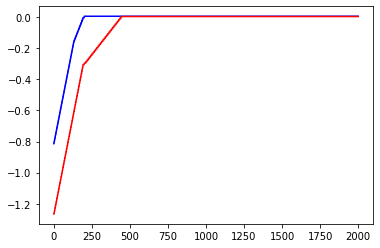

In [6]:
plt.plot(gradPesos[:,0],'b')
plt.plot(gradPesos[:,1],'r')

plt.show()


Finalmente después de la convergencia, es posible probar nuestro perceptrón ahora sí obteniendo los resultados correctos

In [7]:
perceptronAnd.propagacion([0,0,1])
print("Entrada: [0,0] Salida: "+ str(perceptronAnd.salida))
perceptronAnd.propagacion([1,0,1])
print("Entrada: [1,0] Salida: "+ str(perceptronAnd.salida))
perceptronAnd.propagacion([0,1,1])
print("Entrada: [0,1] Salida: "+ str(perceptronAnd.salida))
perceptronAnd.propagacion([1,1,1])
print("Entrada: [1,1] Salida: "+ str(perceptronAnd.salida))

Entrada: [0,0] Salida: 0
Entrada: [1,0] Salida: 1
Entrada: [0,1] Salida: 1
Entrada: [1,1] Salida: 1
